# ANN Final Project: Bird Call Classifier
## Overview
This journal shows our approach to classifying bird calls from the birdclef-2022 dataset on Kaggle. Our approach involves restrucutring the audio files into mel-spectrograms and feeding these spectrograms into a convolutional Neural Network. <b> Two appraoches were taken in the development of this model:
 1. Passing the Mel-Spectrograms into a Tensorflow Conv2d network
 2. Transfer learning using MobileNetV2 Neural Network to extract important features from Mel-Spectrograms and then passing those features through a vanilla-Neural Network for classification (Accuracy on Testing Data = 89.18)

Dataset: https://www.kaggle.com/competitions/birdclef-2022/data

## Data Reformatting - Reformat data to feed into neural Network

### Load Data from train_metadata.csv

Get list of all species used in training data from <b> train_metadata.csv<\b> (this file should be located inside a directory called data inside of your Current Working Directory)

In [38]:
import pandas as pd
train_MetaData = pd.read_csv("Data/train_metadata.csv", index_col = "filename")
train_MetaData.drop(["license", "author"], inplace = True, axis = 1)


In [39]:
train_MetaData

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,rating,time,url
filename,,,,,,,,,,
afrsil1/XC125458.ogg,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,2.5,08:00,https://www.xeno-canto.org/125458
afrsil1/XC175522.ogg,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,3.5,08:30,https://www.xeno-canto.org/175522
afrsil1/XC177993.ogg,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,4.0,11:30,https://www.xeno-canto.org/177993
afrsil1/XC205893.ogg,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,4.0,11:00,https://www.xeno-canto.org/205893
afrsil1/XC207431.ogg,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,3.0,16:30,https://www.xeno-canto.org/207431
...,...,...,...,...,...,...,...,...,...,...
zebdov/XC629769.ogg,zebdov,[],"['adult', 'song']",22.6499,120.2872,Geopelia striata,Zebra Dove,2.5,08:36,https://www.xeno-canto.org/629769
zebdov/XC642415.ogg,zebdov,[],"['adult', 'sex uncertain', 'song']",1.4168,103.7287,Geopelia striata,Zebra Dove,4.0,08:00,https://www.xeno-canto.org/642415
zebdov/XC665873.ogg,zebdov,[],"['adult', 'call', 'sex uncertain']",1.4347,103.7043,Geopelia striata,Zebra Dove,4.0,09:00,https://www.xeno-canto.org/665873


In [40]:
df2 = train_MetaData[["primary_label", "scientific_name", "common_name"]]
df2

,primary_label,scientific_name,common_name
filename,,,
afrsil1/XC125458.ogg,afrsil1,Euodice cantans,African Silverbill
afrsil1/XC175522.ogg,afrsil1,Euodice cantans,African Silverbill
afrsil1/XC177993.ogg,afrsil1,Euodice cantans,African Silverbill
afrsil1/XC205893.ogg,afrsil1,Euodice cantans,African Silverbill
afrsil1/XC207431.ogg,afrsil1,Euodice cantans,African Silverbill
...,...,...,...
zebdov/XC629769.ogg,zebdov,Geopelia striata,Zebra Dove
zebdov/XC642415.ogg,zebdov,Geopelia striata,Zebra Dove
zebdov/XC665873.ogg,zebdov,Geopelia striata,Zebra Dove


### Code to names dictionary
Create a dictionary that stores primary_label as the key, and scientific_name, common_name as a tuple value

In [41]:
codetonames = dict()
for i in range(len(df2)):
    codetonames[ df2.iloc[i,0] ] = (df2.iloc[i,1],df2.iloc[i,2])

In [42]:
codetonames

{'afrsil1': ('Euodice cantans', 'African Silverbill'),
 'akekee': ('Loxops caeruleirostris', 'Akekee'),
 'akepa1': ('Loxops coccineus', 'Hawaii Akepa'),
 'akiapo': ('Hemignathus wilsoni', 'Akiapolaau'),
 'akikik': ('Oreomystis bairdi', 'Akikiki'),
 'amewig': ('Mareca americana', 'American Wigeon'),
 'aniani': ('Magumma parva', 'Anianiau'),
 'apapan': ('Himatione sanguinea', 'Apapane'),
 'arcter': ('Sterna paradisaea', 'Arctic Tern'),
 'barpet': ('Hydrobates castro', 'Band-rumped Storm-Petrel'),
 'bcnher': ('Nycticorax nycticorax', 'Black-crowned Night-Heron'),
 'belkin1': ('Megaceryle alcyon', 'Belted Kingfisher'),
 'bkbplo': ('Pluvialis squatarola', 'Black-bellied Plover'),
 'bknsti': ('Himantopus mexicanus', 'Black-necked Stilt'),
 'bkwpet': ('Pterodroma nigripennis', 'Black-winged Petrel'),
 'blkfra': ('Francolinus francolinus', 'Black Francolin'),
 'blknod': ('Anous minutus', 'Black Noddy'),
 'bongul': ('Chroicocephalus philadelphia', "Bonaparte's Gull"),
 'brant': ('Branta bernicl

### Find Birds With The Most Audio Files

Count number of sounds for each primary_label in order to determine which birds to use in model

In [43]:
from collections import Counter
from collections import defaultdict

primary_labels = (train_MetaData["primary_label"]) #get a list of all codes in train_MetaData 
callsperbird = dict(Counter(primary_labels)) #get how many calls are in the trainingdataset per bird

most_common_birds = Counter(primary_labels).most_common()
most_common_birds.sort
most_common_birds = most_common_birds[0:6]
most_common_birds = dict(most_common_birds)
most_common_birds

{'brnowl': 500,
 'comsan': 500,
 'houspa': 500,
 'mallar3': 500,
 'norcar': 500,
 'skylar': 500}

In [44]:
most_common_list = list(most_common_birds.keys())
usedFiles_df = train_MetaData[0:0]

for bird in most_common_list:
    usedFiles_df = usedFiles_df.append(train_MetaData[train_MetaData["primary_label"] == bird])
usedFiles_df

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,rating,time,url
filename,,,,,,,,,,
brnowl/XC112875.ogg,brnowl,[],['alarm call'],52.3009,6.7620,Tyto alba,Barn Owl,4.0,21:30,https://www.xeno-canto.org/112875
brnowl/XC115605.ogg,brnowl,[],['song'],-20.7900,-42.8882,Tyto alba,Barn Owl,4.0,20:30,https://www.xeno-canto.org/115605
brnowl/XC120974.ogg,brnowl,[],['call'],18.5206,73.8398,Tyto alba,Barn Owl,4.0,23:09,https://www.xeno-canto.org/120974
brnowl/XC121413.ogg,brnowl,[],"['', 'clicks']",-21.5500,-47.7167,Tyto alba,Barn Owl,4.0,05:30,https://www.xeno-canto.org/121413
brnowl/XC138038.ogg,brnowl,[],['begging call'],0.0640,32.4790,Tyto alba,Barn Owl,4.0,23:30,https://www.xeno-canto.org/138038
...,...,...,...,...,...,...,...,...,...,...
skylar/XC666860.ogg,skylar,[],"['mimicry/imitation', 'song']",55.2655,-8.2304,Alauda arvensis,Eurasian Skylark,5.0,13:00,https://www.xeno-canto.org/666860
skylar/XC666885.ogg,skylar,[],['song'],52.2068,-6.4100,Alauda arvensis,Eurasian Skylark,5.0,13:00,https://www.xeno-canto.org/666885
skylar/XC666887.ogg,skylar,[],['subsong'],52.2068,-6.4100,Alauda arvensis,Eurasian Skylark,5.0,13:00,https://www.xeno-canto.org/666887


## Mel-Spectrograms
Mel-Spectrogram stores an image of frequencies in audio file over time

### Create Mel-Spectrograms and Save

In [45]:
import efficientnet.tfkeras as efn
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from efficientnet.keras import preprocess_input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import class_weight
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [46]:
# Plot mel-spectrogram with high-pass filter
def make_melspectrogram(read_file, write_file):
    signal, sr = librosa.load(read_file,duration=10)
    
    N_FFT = 1024
    HOP_SIZE = 1024
    N_MELS = 128
    WIN_SIZE = 1024
    WINDOW_TYPE = "hann"
    FEATURE = "mel"
    FMIN = 1400

    S = librosa.feature.melspectrogram(
        y=signal,
        sr=sr,
        n_fft=N_FFT,
        hop_length=HOP_SIZE,
        n_mels=N_MELS,
        htk=True,
        fmin=FMIN,
        fmax=sr / 2,
    )

    plt.figure(figsize=(10, 4))

    librosa.display.specshow(
        librosa.power_to_db(S ** 2, ref=np.max), fmin=FMIN)

    plt.savefig(write_file,  bbox_inches='tight')
    plt.close()
    print(write_file + "Done!")

Save Mel-Spectrograms to correct folders

In [47]:
for bird in most_common_list:
    pathname = os.path.join("/Users/samgoldberg/Documents/Artificial Neural Networks and Deep Learning/Bird Call Final Project/Data/train_audio/", bird)
    if not os.path.exists(os.getcwd() + "/bird_msg/ "+ bird):
        os.makedirs(os.getcwd() + "/bird_msg/ "+ bird)
    for dataset in ["train", "val", "test"]:
        print(os.getcwd() + "/bird_msg/" + dataset + "/" + bird)
        if not os.path.exists(os.getcwd() + "/bird_msg/" + dataset + "/" + bird):
            os.makedirs(os.getcwd() + "/bird_msg/" + dataset + "/" + bird)
    
    for audiofile in os.listdir(pathname):
        if not os.path.exists(os.getcwd() + "/bird_msg/ "+ bird + "/" + audiofile[:-3] + "png"):
            print(audiofile)
            make_melspectrogram(pathname + "/" + audiofile, os.getcwd() + "/bird_msg/ "+ bird + "/" + audiofile[:-3] + "png")


/Users/samgoldberg/Documents/Artificial Neural Networks and Deep Learning/Bird Call Final Project/bird_msg/train/brnowl
/Users/samgoldberg/Documents/Artificial Neural Networks and Deep Learning/Bird Call Final Project/bird_msg/val/brnowl
/Users/samgoldberg/Documents/Artificial Neural Networks and Deep Learning/Bird Call Final Project/bird_msg/test/brnowl
/Users/samgoldberg/Documents/Artificial Neural Networks and Deep Learning/Bird Call Final Project/bird_msg/train/comsan
/Users/samgoldberg/Documents/Artificial Neural Networks and Deep Learning/Bird Call Final Project/bird_msg/val/comsan
/Users/samgoldberg/Documents/Artificial Neural Networks and Deep Learning/Bird Call Final Project/bird_msg/test/comsan
/Users/samgoldberg/Documents/Artificial Neural Networks and Deep Learning/Bird Call Final Project/bird_msg/train/houspa
/Users/samgoldberg/Documents/Artificial Neural Networks and Deep Learning/Bird Call Final Project/bird_msg/val/houspa
/Users/samgoldberg/Documents/Artificial Neural N

### Load Mel-Spectrograms

In [48]:
#functin used to show images - takes a list of images as input
def show_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

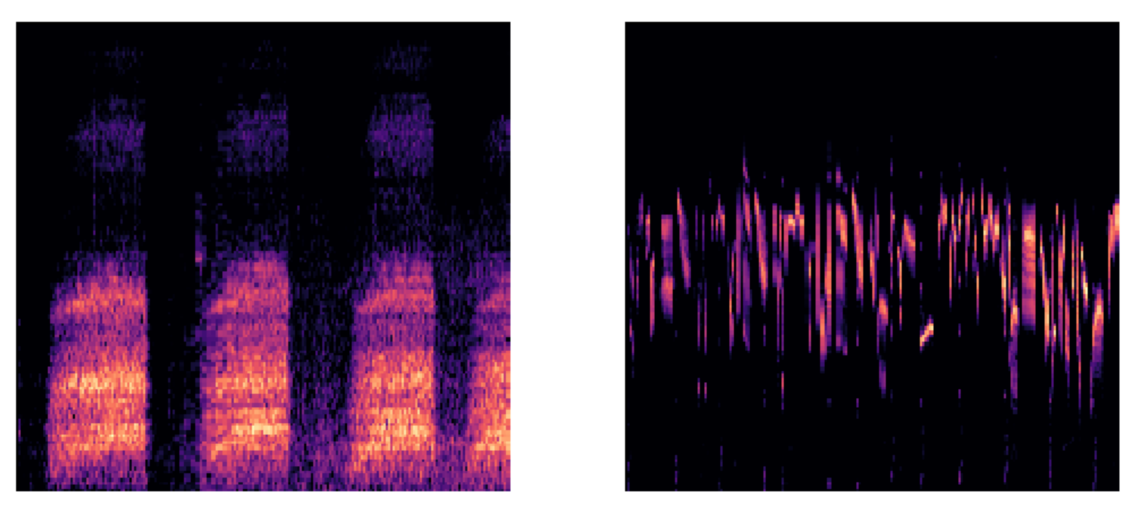

In [49]:
from keras.preprocessing import image
#function that loads image from audiofile
def Image_From_Audio(X_ta):
    X_img = []
    for audiofile in X_ta:
        image_path = os.getcwd() + "/bird_msg/ " + audiofile[:-3] + "png"
        X_img.append(image.img_to_array(image.load_img(image_path, target_size=(224, 224, 3))))
    return X_img
    #for file in X_train:
images= Image_From_Audio(["brnowl/XC112875.ogg", "skylar/XC666939.ogg"]);  
show_images(images)

In [50]:
#Function used for One-hot encoding of labels
def encode_labels(y_ta):
    y_coded = []
    for label in y_ta:
        y_coded.append(most_common_list.index(label))
    return y_coded

## Convolutional Neural Network

### Separating Training (80%), Validation (10%), and Testing data (10%)
Use "usedFiles_df" to access filename as an input and bird code as output. filename will be used to get spectrogram

In [51]:
import time
X_ta = list(usedFiles_df.index)
print("Creating image files from audio in X_ta")
start = time.time()
X_ta = Image_From_Audio(X_ta)
end = time.time()
print("Image Loading time = ", (end-start), " Seconds")

y_ta = usedFiles_df["primary_label"]
start = time.time()
y_ta = encode_labels(y_ta)
end = time.time()
print("labels encoding time = ", (end-start), " Seconds")

Creating image files from audio in X_ta
Image Loading time =  10.286490201950073  Seconds
labels encoding time =  0.0006022453308105469  Seconds


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X_ta, y_ta, test_size = 0.2, random_state = 3)

In [53]:
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size = 0.5, random_state = 3)

In [54]:
print("X_train size = ", len(X_train), " y_train size = ", len(y_train))
print("X_val size = ", len(X_val), " y_val size = ", len(y_val))
print("X_test size = ", len(X_test), " y_test size = ", len(y_test))

X_train size =  2400  y_train size =  2400
X_val size =  300  y_val size =  300
X_test size =  300  y_test size =  300


[1, 3, 4, 4, 4, 2, 4, 3]


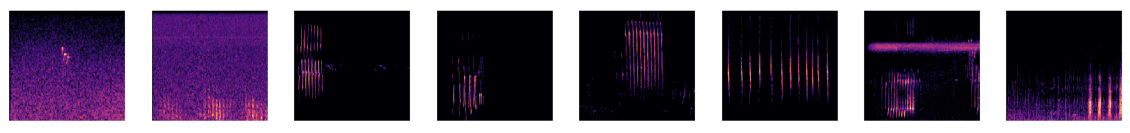

In [55]:
show_images(X_train[:8])
print(y_train[:8])
from keras.preprocessing import image

## Build Model for Convolutional Neural Network through Transfer Learning using MobileNetV2

https://github.com/jeffprosise/Deep-Learning/blob/master/Audio%20Classification%20(CNN).ipynb

one-hot-encode the labels using Keras's to_categorical function.

In [56]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

Preprocess input data for x_train, x_val, x_test

### Try Creating Convolutional Neural Network

In [57]:
x_train_norm = np.array(X_train) / 255
x_val_norm = np.array(X_val) / 255
x_test_norm = np.array(X_test) / 255

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(2, 2))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 373248)            0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [32]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=32, epochs=10)

Epoch 1/10
75/75 [==============================] - 158s 2s/step - loss: 0.2975 - accuracy: 0.9150 - val_loss: 1.0470 - val_accuracy: 0.7600
Epoch 2/10
75/75 [==============================] - 153s 2s/step - loss: 0.0452 - accuracy: 0.9896 - val_loss: 1.2954 - val_accuracy: 0.7967
Epoch 3/10
75/75 [==============================] - 148s 2s/step - loss: 0.0240 - accuracy: 0.9950 - val_loss: 1.4092 - val_accuracy: 0.7600
Epoch 4/10
75/75 [==============================] - 151s 2s/step - loss: 0.0167 - accuracy: 0.9967 - val_loss: 1.5349 - val_accuracy: 0.7500
Epoch 5/10
75/75 [==============================] - 144s 2s/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 1.6078 - val_accuracy: 0.7633
Epoch 6/10
75/75 [==============================] - 145s 2s/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 1.6686 - val_accuracy: 0.7567
Epoch 7/10
75/75 [==============================] - 144s 2s/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 1.6863 - val_accuracy: 0.7733
Epoch 8/10
75

[]

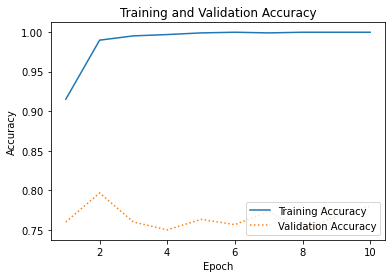

In [33]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Accuracy is not high enough and model is overfitted. Use MobileNetV2 instead

Text(89.18, 0.5, 'Actual label')

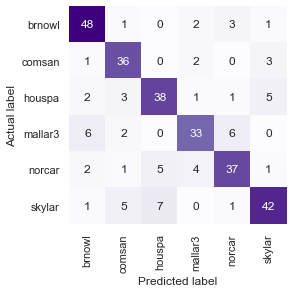

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = most_common_list

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Purples',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

### Use transfer Learning by applying MobileNetV2 Convolutional Neural Network
MobileNetV2 is a pretrained convolutional Neural Network from Google that is optimized for mobile devices to extract important features from a spectrogram image

#### Extract Features From Spectrograms Using MovileNetV2

In [277]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
import time
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

print("BEGINNING PREPROCESSING: ")
start = time.time()

print("Preprocessing and normalizing X_train input")
x_train_norm = preprocess_input(np.array(X_train))

print("Preprocessing and normalizing X_val input")
x_val_norm = preprocess_input(np.array(X_val))

print("Preprocessing and normalizing X_test input")
x_test_norm = preprocess_input(np.array(X_test))
end = time.time()
print("Total Preprocessing Time: ", round((end-start),2), " Seconds")
#############################################################
#extract import feautres from input images using MobileNettV2 features extraction
#############################################################
print("\n BEGINNING FEATURE EXTRACTION on IMAGES: ")
start = time.time()

print("Extracting Features From input: train_features ", )
start_train = time.time()
train_features = base_model.predict(x_train_norm)
end_train = time.time()
print(round((end_train-start_train),2), " Seconds")

print("Extracting Features From input: val_features ", )
start_val = time.time()
val_features = base_model.predict(x_val_norm)
end_val = time.time()
print(round((end_val-start_val),2), " Seconds")

print("Extracting Features From input: test_features ", )
start_test = time.time()
test_features = base_model.predict(x_test_norm)
end_test = time.time()
print(round((end_test-start_test),2), " Seconds")

end = time.time()
print("Total Feature Extraction Time: ", round((end-start),2), " Seconds")

BEGINNING PREPROCESSING: 
Preprocessing and normalizing X_train input
Preprocessing and normalizing X_val input
Preprocessing and normalizing X_test input
Total Preprocessing Time:  1.9  Seconds

 BEGINNING FEATURE EXTRACTION on IMAGES: 
Extracting Features From input: train_features 
24.42  Seconds
Extracting Features From input: val_features 
3.31  Seconds
Extracting Features From input: test_features 
2.73  Seconds
Total Feature Extraction Time:  30.46  Seconds


#### Create Model To Predict Bird From Features

In [293]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [294]:
hist = model.fit(train_features, y_train_encoded, validation_data=(val_features, y_val_encoded), batch_size=128, epochs=10)

Epoch 1/10
19/19 [==============================] - 5s 208ms/step - loss: 34.1061 - accuracy: 0.5392 - val_loss: 2.4033 - val_accuracy: 0.7467
Epoch 2/10
19/19 [==============================] - 4s 189ms/step - loss: 1.0041 - accuracy: 0.8313 - val_loss: 0.5675 - val_accuracy: 0.8500
Epoch 3/10
19/19 [==============================] - 4s 188ms/step - loss: 0.2562 - accuracy: 0.9133 - val_loss: 0.3823 - val_accuracy: 0.8800
Epoch 4/10
19/19 [==============================] - 4s 194ms/step - loss: 0.1045 - accuracy: 0.9667 - val_loss: 0.4319 - val_accuracy: 0.8867
Epoch 5/10
19/19 [==============================] - 4s 191ms/step - loss: 0.0547 - accuracy: 0.9867 - val_loss: 0.4271 - val_accuracy: 0.8767
Epoch 6/10
19/19 [==============================] - 4s 190ms/step - loss: 0.0291 - accuracy: 0.9967 - val_loss: 0.4568 - val_accuracy: 0.8767
Epoch 7/10
19/19 [==============================] - 3s 184ms/step - loss: 0.0187 - accuracy: 0.9992 - val_loss: 0.4755 - val_accuracy: 0.8733
Epoch

[]

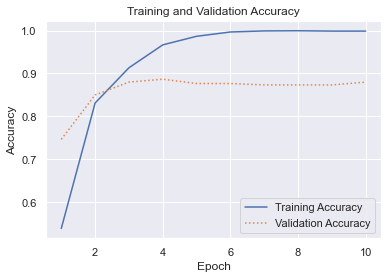

In [295]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Text(89.18, 0.5, 'Actual label')

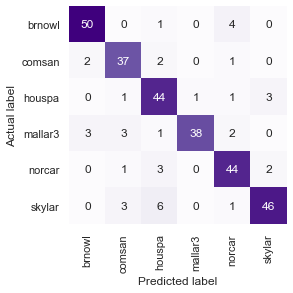

In [300]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = most_common_list

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Purples',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')